# Part I

In [1]:
%%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1682871444365_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/8f/8dbe2d4efc4c0b08ec67d6efb7cc31fbfd688c80afad85f65980633b0d37/kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

In [3]:
#Load all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import split, col, explode, count, desc, mean
from pyspark.sql.types import DoubleType, IntegerType, FloatType

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

In [4]:
#load all necessary data from s3
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Actors

In [5]:
#Show actors schema
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

In [6]:
#Display the first 5 rows
actors.select("primaryName", "birthYear", "deathYear","knownForTitles").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

# Genres

In [7]:
#Display the first 15 rows with the following columns
genres.select("titleType","primaryTitle","genres").show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
|    short|Akrobatisches Pot...|   Documentary,Short|
|    short|The Arrival of a ...|Action,Documentar...|
|    short|The Photographica...|   Documentary,Short|
|    short|The Sprinkler Spr...|        Comedy,Short|
|    short| Autour d'une cabine|     Animation,Short|
+---------+-----------------

In [8]:
#Display the unique titles 
(genres.select("titleType").distinct()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

In [9]:
#Display the schema
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

# Movie Actors

In [10]:
#Display the schema
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [11]:
#Display the first 15 rows where the "category" column is "self"
(movie_actors.filter(movie_actors.category == "self")).show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+---+--------------------+
|   tconst|ordering|   nconst|category|job|          characters|
+---------+--------+---------+--------+---+--------------------+
|tt0000001|       1|nm1588970|    self| \N|         ["Herself"]|
|tt0000012|       1|nm2880396|    self| \N|         ["Herself"]|
|tt0000012|       2|nm9735580|    self| \N|         ["Himself"]|
|tt0000012|       3|nm0525900|    self| \N|         ["Herself"]|
|tt0000012|       4|nm9735581|    self| \N|         ["Herself"]|
|tt0000012|       7|nm9735579|    self| \N|         ["Herself"]|
|tt0000012|       8|nm9653419|    self| \N|         ["Herself"]|
|tt0000013|       1|nm0525908|    self| \N|         ["Himself"]|
|tt0000013|       2|nm1715062|    self| \N|         ["Himself"]|
|tt0000016|       1|nm0525900|    self| \N|["Herself (on the...|
|tt0000016|       2|nm9735581|    self| \N|["Herself (on the...|
|tt0000024|       1|nm0256651|    self| \N|["Herself - Empre...|
|tt0000024|       2|nm043

# Movie Ratings

In [12]:
#Display the schema
movie_ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

In [13]:
#Display the first 10 rows in a descending order by the number of votes
movie_ratings = movie_ratings.withColumn("Numvotes", movie_ratings["Numvotes"].cast(DoubleType()))
movie_ratings.orderBy(desc("Numvotes")).show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+---------+
|   tconst|averageRating| Numvotes|
+---------+-------------+---------+
|tt0111161|          9.3|2159745.0|
|tt0468569|          9.0|2134602.0|
|tt1375666|          8.8|1892958.0|
|tt0137523|          8.8|1725444.0|
|tt0110912|          8.9|1695159.0|
|tt0109830|          8.8|1662609.0|
|tt0944947|          9.4|1606096.0|
|tt0133093|          8.7|1554345.0|
|tt0120737|          8.8|1548920.0|
|tt0167260|          8.9|1533632.0|
|tt0068646|          9.2|1482225.0|
|tt1345836|          8.4|1421506.0|
|tt0167261|          8.7|1387208.0|
|tt0816692|          8.6|1348184.0|
|tt0114369|          8.6|1327441.0|
+---------+-------------+---------+
only showing top 15 rows

# Overview of Data

In [14]:
#Display the number of rows and columns in each dataFrame object.
num_cols_actors = len(actors.columns)
num_rows_actors = actors.count()
print(f"Number of columns in Actors table: {num_cols_actors}")
print(f"Number of rows in Actors table: {num_rows_actors}")
print()
num_cols_genres = len(genres.columns)
num_rows_genres = genres.count()
print(f"Number of columns in Genres table: {num_cols_genres}")
print(f"Number of rows in Genres table: {num_rows_genres}")
print()
num_cols_movie_actors = len(movie_actors.columns)
num_rows_movie_actors = movie_actors.count()
print(f"Number of columns in Movie Actors table: {num_cols_movie_actors}")
print(f"Number of rows in Movie Actors table: {num_rows_movie_actors}")
print()
num_cols_movie_ratings = len(movie_ratings.columns)
num_rows_movie_ratings = movie_ratings.count()
print(f"Number of columns in Movie Ratings table: {num_cols_movie_ratings}")
print(f"Number of rows in Movie Ratings table: {num_rows_movie_ratings}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table: 6
Number of rows in Actors table: 9706922

Number of columns in Genres table: 9
Number of rows in Genres table: 6321302

Number of columns in Movie Actors table: 6
Number of rows in Movie Actors table: 36468817

Number of columns in Movie Ratings table: 3
Number of rows in Movie Ratings table: 993153

# PART 2 - Analyzing Genres

In [15]:
#Select colums
genres1 = genres.select("tconst","titleType","genres")
genres1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

In [16]:
#explode genres
seperated_genres = genres.select("tconst", "titleType", explode(split("genres", ","))).withColumnRenamed("col", "genres")
seperated_genres.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|     genres|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

# Unique Genre

In [17]:
#finding amount of unique genres
unique_genres = seperated_genres.select("genres").distinct()
unique_genres_count = seperated_genres.select("genres").distinct().count()
print(unique_genres_count)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

In [18]:
#listing unique genres
seperated_genres.select("genres").distinct().show(unique_genres_count)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|      Short|
|  Film-Noir|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

In [19]:
#Removing Null

nll = '\\N'
seperated_genres_filtered = seperated_genres.select("genres") \
    .filter(col("genres") != nll)
seperated_genres_filtered_count = seperated_genres_filtered.distinct().count()
seperated_genres_filtered.distinct().show(seperated_genres_filtered_count)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|      Short|
|  Film-Noir|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

# Top Genres by Movies

In [20]:
#removing non-movies
only_movies = genres.filter(genres.titleType == "movie")
separated_movies = only_movies.select("tconst", "titleType", explode(split("genres", ","))).withColumnRenamed("col", "genres")
#droping the nulls
separated_movies_filtered = separated_movies.filter(separated_movies.genres != r'\N')
#joining the data
joined_data = movie_ratings.join(separated_movies_filtered, on="tconst", how="inner")
genre_avg_ratings = joined_data.select("genres", "averageRating")
genre_avg_ratings.show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|   genres|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

In [21]:
#displays average rating per genre
genre_avg_ratings_grouped = genre_avg_ratings.groupBy("genres").agg(mean("averageRating").alias("avg_rating"))
genre_avg_ratings_grouped.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|     genres|        avg_rating|
+-----------+------------------+
|    Mystery|5.9404375359815775|
|    Musical|6.2032460545193695|
|     Action|  5.71873406966865|
|      Sport| 6.600145190562614|
|  Talk-Show|               5.8|
|    Romance|6.1257141803973605|
|   Thriller| 5.625967566447332|
| Reality-TV| 6.379310344827585|
|     Family| 6.250560452715202|
|    Fantasy| 5.924820762833381|
|    History| 6.822718115605145|
|  Animation| 6.326203750633556|
|  Film-Noir| 6.636246786632391|
|      Short|              7.26|
|     Sci-Fi| 5.325150008571917|
|       News| 7.200916030534349|
|      Drama| 6.288080210387902|
|Documentary| 7.245469798657718|
|    Western| 5.948970989337962|
|     Comedy| 5.941363108004127|
+-----------+------------------+
only showing top 20 rows

# Horizontal Bar Chart of Top Genres

In [22]:
#putting data in descending order
genre_avg_ratings_grouped_desc = genre_avg_ratings_grouped.orderBy(desc("avg_rating"))
genre_avg_ratings_grouped_desc.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|     genres|        avg_rating|
+-----------+------------------+
|      Short|              7.26|
|Documentary| 7.245469798657718|
|       News|7.2009160305343505|
|  Biography| 6.983637640449438|
|  Game-Show|             6.975|
|    History| 6.822718115605145|
|      Music| 6.752020202020203|
|  Film-Noir| 6.636246786632391|
|      Sport| 6.600145190562614|
|        War| 6.483807030665668|
| Reality-TV| 6.379310344827586|
|  Animation| 6.326203750633553|
|      Drama| 6.288080210387902|
|     Family| 6.250560452715204|
|    Musical|6.2032460545193695|
|    Romance| 6.125714180397362|
|      Crime|  6.02601333268454|
|    Western| 5.948970989337962|
|     Comedy| 5.941363108004129|
|    Mystery|5.9404375359815775|
+-----------+------------------+
only showing top 20 rows

In [23]:
#Plotting bar chart
genresx = genre_avg_ratings_grouped_desc.rdd.map(lambda x: x.genres).collect()
avg_ratingsy = genre_avg_ratings_grouped_desc.rdd.map(lambda x: x.avg_rating).collect()
plt.figure(figsize=(10, 6))
plt.barh(genresx, avg_ratingsy, color='purple',label="Genres")
plt.xlim(5, 7.5)
plt.gca().invert_yaxis()
plt.legend()
plt.legend(loc="lower right")
plt.title("Average Rating per Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Genre')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

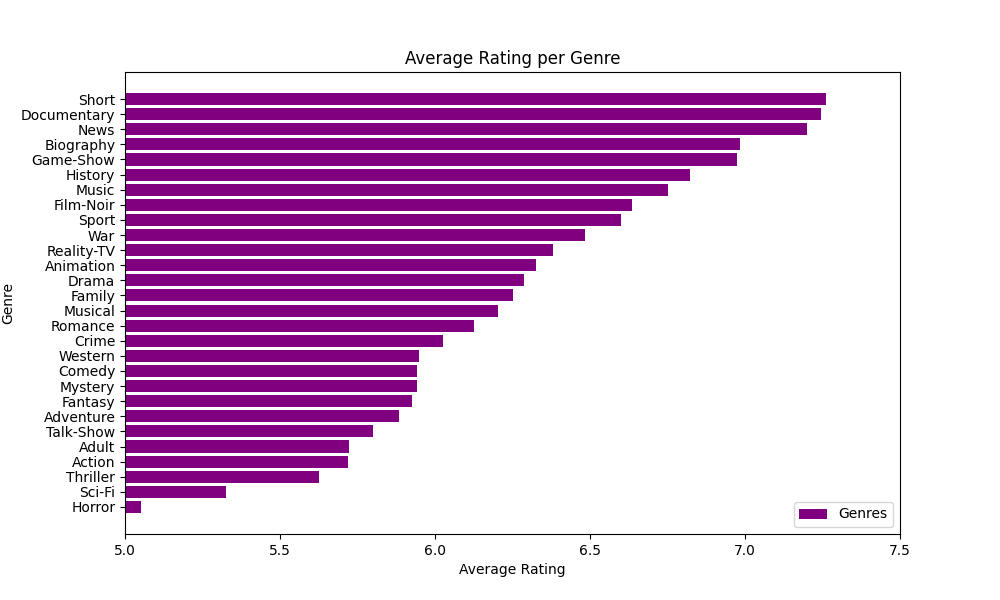

In [24]:
%matplot plt

# PART 3 - Analyzing Job Categories
Total Unique Job Categories

In [25]:
#finding unique catagories and amount
seperated_movie_actors = movie_actors.select("tconst","category")
seperated_movie_actors.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [26]:
#distinct categories / count
unique_movie_actors = seperated_movie_actors.select("category").distinct()
unique_movie_actors_count = seperated_movie_actors.select("category").distinct().count()
print(unique_movie_actors_count)
unique_movie_actors.show(unique_movie_actors_count)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12
+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

# Top Job Categories

In [27]:
#counting amount of categories counted in data
movie_actors_category_count = seperated_movie_actors.groupBy("category").count()
movie_actors_category_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

In [28]:
#making it in descending order
movie_actors_category_count_desc = movie_actors_category_count.orderBy(desc("count"))
movie_actors_category_count_desc.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

In [29]:
#graphing Top Job Categories
top_categoryx = movie_actors_category_count_desc.rdd.map(lambda x: x.category).take(5)
top_county = movie_actors_category_count_desc.rdd.map(lambda x: x['count']).take(5)
plt.figure(figsize=(10, 6))
plt.bar(top_categoryx, top_county, color='orange', label="Count", width=0.5) 
plt.ylim(bottom=3) 
plt.legend(loc="upper right")
plt.title("Top Job Categories")
plt.xlabel("Job Categories")
plt.ylabel("Count")
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

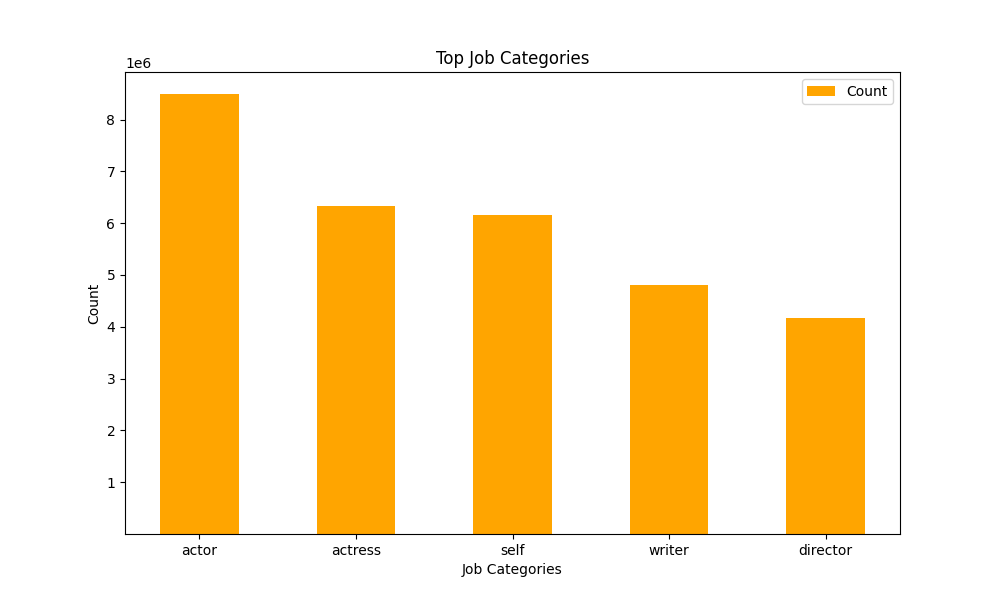

In [30]:
%matplot plt

# PART 4 - Answer to the following questions:
1) Find all the movies acted by both Johnny Depp and Helena Bonham Carter

In [31]:
#joining  actors, genres, and movie_actors
genres_movies_only = genres.filter(genres.titleType == "movie")
movie_actors_filtered = movie_actors.filter((col("category") == "actor") | (col("category") == "actress"))
combine_dfs = actors.join(movie_actors_filtered, on='nconst', how='inner')
combine_dfs1 = combine_dfs.join(genres_movies_only, on='tconst', how='inner')
combine_dfs_final = combine_dfs1.select("primaryName", "knownForTitles", "primaryTitle", "startYear", "endYear", "tconst", "nconst")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
#finding Johnny Depp and Helena Bonham Carter movies
johnny_depp_movies = combine_dfs_final.filter(combine_dfs_final.primaryName == "Johnny Depp")
helena_bonham_carter_movies = combine_dfs_final.filter(combine_dfs_final.primaryName == "Helena Bonham Carter")

johnny_depp_tc = [row.tconst for row in johnny_depp_movies.collect()]
helena_bonham_carter_tc = [row.tconst for row in helena_bonham_carter_movies.collect()]

common_tc = list(set(johnny_depp_tc).intersection(helena_bonham_carter_tc))

common_movies = genres_movies_only.filter(genres_movies_only.tconst.isin(common_tc))

common_movies.select("primaryTitle").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice in Wonderland                           |
|Dark Shadows                                  |
|Alice Through the Looking Glass               |
+----------------------------------------------+

# 2) Find all the movies acted by Brad Pitt after 2010.

In [33]:
#Finding all the movies acted by Brad Pitt after 2010.
combine_dfs_final = combine_dfs_final.withColumn("startYear", combine_dfs_final["startYear"].cast(IntegerType()))

brad_pitt_movies = combine_dfs_final.filter((combine_dfs_final.primaryName == "Brad Pitt") &
                                             (combine_dfs_final.startYear > 2010) &
                                             col("startYear").isNotNull())
brad_pitt_movies_titles_years = brad_pitt_movies.select("primaryTitle", "startYear")
brad_pitt_movies_titles_years_sorted = brad_pitt_movies_titles_years.orderBy(desc("startYear"))
brad_pitt_movies_titles_years_sorted.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Ad Astra                         |2019     |
|Once Upon a Time ... in Hollywood|2019     |
|War Machine                      |2017     |
|Allied                           |2016     |
|By the Sea                       |2015     |
|The Big Short                    |2015     |
|Fury                             |2014     |
|World War Z                      |2013     |
|12 Years a Slave                 |2013     |
|Killing Them Softly              |2012     |
|Moneyball                        |2011     |
|The Tree of Life                 |2011     |
+---------------------------------+---------+

# What is the number of movies acted by Zendaya per year

In [34]:
#Finding number of zendaya movies by year
zendaya_movies = combine_dfs_final.filter((combine_dfs_final.primaryName == "Zendaya") & col("startYear").isNotNull())
zendaya_movies_by_year = zendaya_movies.groupBy("startYear").agg(count("tconst").alias("num_movies"))
zendaya_movies_by_year_sorted = zendaya_movies_by_year.orderBy("startYear")
zendaya_movies_by_year_sorted.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----------+
|startYear|num_movies|
+---------+----------+
|     2017|         1|
|     2018|         2|
|     2020|         1|
+---------+----------+

# 4) What are the movies by average rating greater than 9.7 and released in 2019?

In [35]:
#putting movies rated > 9.7 in year 2019 in descending order
movie_ratings = movie_ratings.withColumn("averageRating", movie_ratings["averageRating"].cast(FloatType()))
genres_movies_only = genres_movies_only.withColumn("startYear", genres_movies_only["startYear"].cast(IntegerType()))
high_rated_movies = movie_ratings.filter(movie_ratings.averageRating > 9.7)
movies_2019 = genres_movies_only.filter(genres_movies_only.startYear == 2019)
high_rated_movies_2019 = high_rated_movies.join(movies_2019, on='tconst', how='inner')
high_rated_movies_2019_titles = high_rated_movies_2019.select("primaryTitle", "averageRating")
high_rated_movies_2019_titles_sorted = high_rated_movies_2019_titles.orderBy(desc("averageRating"))
high_rated_movies_2019_titles_sorted.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|primaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|A Grunt's Life                                   |10.0         |
|Our Scripted Life                                |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|The Butcher Baronet                              |10.0         |
|Kirket                                           |10.0         |
|A Medicine for the Mind                          |10.0         |
|Love in Kilnerry                                 |10.0         |
|L'Enfant Terrible                                |10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|Superhombre                                      |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|The Cardinal                                     |9.9          |
|Randhawa 

# Extra Credit - Analysis of your choice (3 pts)

# What are the top 15 most common birth years for Actors who are alive currently, and how many currently alive actors were born in each of those years?

In [136]:
living_actors = actors.filter(col("primaryProfession").isin("actor", "actress") & (col("deathYear") == "\\N") & (col("birthYear") != "\\N"))
birthyear_count = living_actors.groupBy("birthYear").count()
top_birth_years = birthyear_count.orderBy(col("count").desc()).limit(15)
top_birth_years.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|birthYear|count|
+---------+-----+
|     1980| 2818|
|     1979| 2722|
|     1982| 2709|
|     1978| 2661|
|     1981| 2642|
|     1984| 2569|
|     1983| 2554|
|     1985| 2542|
|     1986| 2536|
|     1976| 2504|
|     1977| 2450|
|     1987| 2356|
|     1975| 2281|
|     1974| 2258|
|     1988| 2228|
+---------+-----+

# Pie Chart of top birth years of living actors

In [137]:
data = top_birth_years.collect()
birth_years = [row['birthYear'] for row in data]
counts = [row['count'] for row in data]

# Creating a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=birth_years, autopct='%1.1f%%', startangle=90)

ax.axis('equal')

plt.title('Top 15 Birth Years of Living Actors')
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

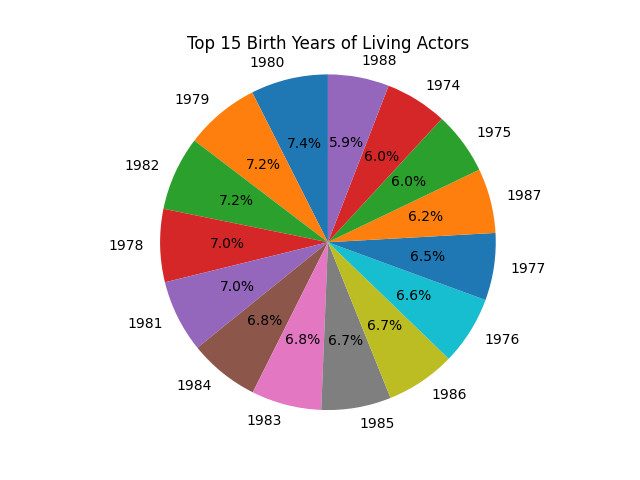

In [138]:
%matplot plt

# Extra Credit - Answering a question of your choice (3 pts)

# Who are the Actors / Actresses with the most movies made on or after the year 2000 (excluding adult movies.) What is the average rating of the films they've feautred in? 

In [132]:
actors_filtered = actors.filter(col("primaryProfession").contains("actor") | col("primaryProfession").contains("actress"))

actor_movie_join = actors_filtered.join(movie_actors, "nconst")

only_movies = genres.filter((genres.titleType == "movie") & (genres.startYear >= "2000") & (genres.isAdult == "0"))
actor_movie_only_movies_join = actor_movie_join.join(only_movies, "tconst")
actor_movie_rating_join = actor_movie_only_movies_join.join(movie_ratings, "tconst")
actor_avg_rating = actor_movie_rating_join.groupBy("nconst", "primaryName").agg(avg(col("averageRating")).alias("avg_rating"), count("tconst").alias("movie_count"))

top_actors = actor_avg_rating.sort(col("movie_count").desc(), col("avg_rating").desc()).limit(20)
top_actors.select("primaryName","avg_rating","movie_count").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+-----------+
|         primaryName|        avg_rating|movie_count|
+--------------------+------------------+-----------+
|        Eric Roberts|  4.61864951339182|        311|
|        Brahmanandam| 5.333333349695392|        306|
|         Prakash Raj| 6.113907283505067|        302|
|            Mohanlal| 5.420982139451163|        224|
|           Mammootty| 5.543601884661127|        211|
|                 Ali| 5.462200946785046|        209|
|      Michael Madsen|  4.58557692857889|        208|
|        Paulo Branco| 5.958937180790924|        207|
|          Jason Blum| 5.788442209138343|        199|
|   Rabiranjan Maitra| 6.468686869650176|        198|
|        Akshay Kumar| 5.691919170244776|        198|
|         Anupam Kher| 5.439086283524024|        197|
|        Tom Sizemore|4.9819148829642765|        188|
|Prithviraj Sukumaran| 6.106989242697275|        186|
|         Danny Trejo|  4.96408837671438|        181|
|    Amitabh Bachchan| 6.001